In [80]:
import pandas as pd

In [81]:
data = pd.read_csv("sh.csv")

In [82]:
data.head()

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


In [83]:
data.isnull().sum()

Height    0
Weight    0
Size      0
dtype: int64

In [84]:
data.dtypes

Height     int64
Weight     int64
Size      object
dtype: object

In [85]:
#Always target in int
x = data[['Height','Weight']]
x.head()

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60


In [107]:
x[0].axis=0

KeyError: 0

In [86]:

# target label
y = data['Size']
y.head()


0    M
1    M
2    M
3    M
4    M
Name: Size, dtype: object

In [87]:
y

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     L
8     L
9     L
10    L
11    L
12    L
13    L
14    L
15    L
16    L
17    L
Name: Size, dtype: object

In [88]:
y1 = pd.get_dummies(data['Size'])
y1


,L,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


In [89]:
data.count()

Height    18
Weight    18
Size      18
dtype: int64

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
print(dir(KNeighborsClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_algorithm_metric', '_estimator_type', '_fit', '_get_param_names', '_kneighbors_reduce_func', '_pairwise', 'fit', 'get_params', 'kneighbors', 'kneighbors_graph', 'predict', 'predict_proba', 'score', 'set_params']


In [92]:
help(KNeighborsClassifier.fit)

Help on function fit in module sklearn.neighbors.base:

fit(self, X, y)
    Fit the model using X as training data and y as target values
    
    Parameters
    ----------
    X : {array-like, sparse matrix, BallTree, KDTree}
        Training data. If array or matrix, shape [n_samples, n_features],
        or [n_samples, n_samples] if metric='precomputed'.
    
    y : {array-like, sparse matrix}
        Target values of shape = [n_samples] or [n_samples, n_outputs]



In [93]:
knn = KNeighborsClassifier()

In [94]:

# train the model
knn.fit(x,y1['L'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [95]:
# test the model
y_pred = knn.predict(x)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [97]:
print(dir(sklearn.metrics))

['SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'mutual_info_score', 'normalized_mutu

In [98]:
import sklearn

In [99]:
print(dir(sklearn))

['__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', 'base', 'clone', 'config_context', 'datasets', 'exceptions', 'externals', 'feature_extraction', 'get_config', 'logger', 'logging', 'metrics', 'model_selection', 'neighbors', 'preprocessing', 'random_projection', 're', 'set_config', 'setup_module', 'show_versions', 'sys', 'utils', 'warnings']


In [100]:
accuracy_score(y1['L'],y_pred)

0.8333333333333334

In [101]:
confusion_matrix(y1['L'],y_pred)


array([[ 5,  2],
       [ 1, 10]], dtype=int64)

In [63]:
d =knn.predict([[186,65]])
d
d = knn.predict([[int(input()),int(input())]])
if d==1:
    print("L")
else:
    print("M")
    
    

185
65
L


In [56]:
knn.predict([[125,98]])

array([0], dtype=uint8)

In [102]:
from matplotlib import pyplot

In [115]:

adm_got = data.loc[y1["L"]==1]
adm_got.head()



,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L


In [116]:
not_adm = data.loc[y1["L"]==0]
not_adm.head()


,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


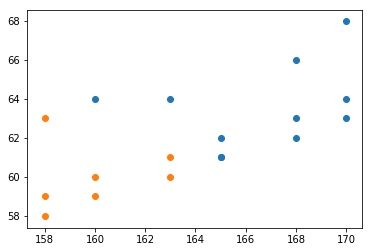

In [117]:

import matplotlib.pyplot as plt
plt.scatter(adm_got.iloc[:,0],adm_got.iloc[:,1])
plt.scatter(not_adm.iloc[:,0],not_adm.iloc[:,1])
plt.show()

In [72]:
tp+tn/(tp+tn+fp+fn)

NameError: name 'tp' is not defined

In [73]:
(10+5)/(5+2+1+10)

0.8333333333333334

In [74]:
from matplotlib import pyplot

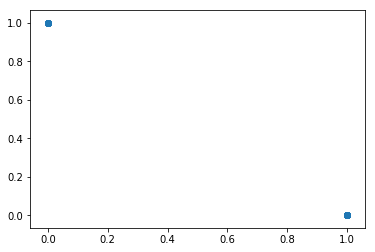

In [79]:
pyplot.scatter(y1["L"],y1["M"])

In [80]:
import numpy as np


In [85]:
a = np.array([[y1["L"],y1["M"]]])
a

array([[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]],
      dtype=uint8)

In [82]:
b=np.array(y1["M"])
b

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

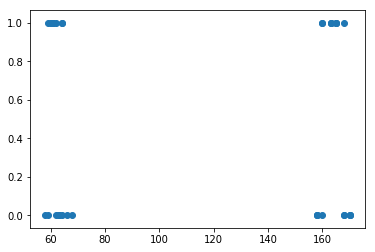

In [86]:
pyplot.scatter(x,a)

In [64]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [65]:
x = iris_data['data']
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [66]:
y =iris_data['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
import pandas as pd
y1 = pd.get_dummies(iris_data.target)
y1

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [6]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.25,random_state=0)

In [6]:
#knn.fit(x,y1[0])

In [70]:
from sklearn.neighbors import KNeighborsClassifier
kn1 = KNeighborsClassifier(n_neighbors=3)

In [71]:

kn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [72]:
# test the model
y_pred1 = kn1.predict(x_test)
y_pred1

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [73]:

from sklearn.metrics import accuracy_score,confusion_matrix


In [74]:
accuracy_score(y_test,y_pred1)

0.9736842105263158

In [75]:
kn1.predict([[5.1, 3.5, 1.4, 0.2]])

array([[1, 0, 0]], dtype=uint8)

In [76]:
kn1.predict([[5.9, 3. , 5.1, 1.8]])

array([[0, 0, 1]], dtype=uint8)

In [77]:
confusion_matrix(y_test.values.argmax(axis=1),y_pred1.argmax(axis=1))

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [27]:
#y1.iloc[:,0:4].values.argmax(axis=1)
y_test.values.argmax(axis=1)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1], dtype=int64)

In [28]:
from matplotlib import pyplot

ValueError: x and y must be the same size

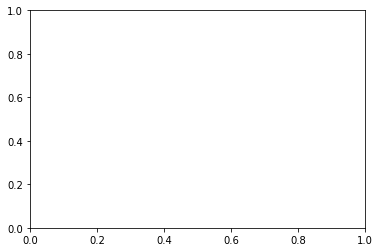

In [79]:
pyplot.scatter(x_train,y_train)

In [14]:
import pandas as pd
df = pd.read_excel("New Meeting Attendees (4).xls")

In [16]:
df

,New Meeting Attendees,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,GoToMeeting
0,Summary,NaN,NaN,NaN,NaN,NaN,NaN
1,Meeting Date,Meeting Duration,Number of Attendees,Meeting ID,NaN,NaN,NaN
2,"August 24, 2020 7:14 PM PDT",157 minutes,153,744-870-701,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Details,NaN,NaN,NaN,NaN,NaN,NaN
5,Name,Email Address,Join Time,Leave Time,Time in Session (minutes),NaN,NaN
6,0317028629-Shaik Reshma-Dr.AER Degree And P.G ...,shaikreshma0256@gmail.com,7:23 PM,9:48 PM,145,NaN,NaN
7,0317028629-Shaik Reshma-Dr.AER Degree and P.G ...,shaikreshma0256@gmail.com,7:32 PM,7:44 PM,12,NaN,NaN
8,0317028629-Shaik Reshma-Dr.AER Degree and P.G ...,shaikreshma0256@gmail.com,7:45 PM,9:19 PM,94,NaN,NaN
9,10KN1A0489-NARAYANA REDDY-NRIIT,janu.a7.nriit.eceb@gmail.com,7:23 PM,9:39 PM,136,NaN,NaN


In [18]:
df1 = df.drop([0,1,2,3,4,5],axis=0)

In [19]:
df1

,New Meeting Attendees,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,GoToMeeting
6,0317028629-Shaik Reshma-Dr.AER Degree And P.G ...,shaikreshma0256@gmail.com,7:23 PM,9:48 PM,145,NaN,NaN
7,0317028629-Shaik Reshma-Dr.AER Degree and P.G ...,shaikreshma0256@gmail.com,7:32 PM,7:44 PM,12,NaN,NaN
8,0317028629-Shaik Reshma-Dr.AER Degree and P.G ...,shaikreshma0256@gmail.com,7:45 PM,9:19 PM,94,NaN,NaN
9,10KN1A0489-NARAYANA REDDY-NRIIT,janu.a7.nriit.eceb@gmail.com,7:23 PM,9:39 PM,136,NaN,NaN
10,10W51A0333- Durga Prasad PJ -SVTM (JNTUA),durgapj.badri@gmail.com,7:26 PM,9:49 PM,143,NaN,NaN
11,11716045-Sunayana-SVU College Of Engineering,pendem.sunayana@gmail.com,7:38 PM,7:40 PM,1,NaN,NaN
12,11716045-Sunayana-SVU College Of Engineering,pendem.sunayana@gmail.com,7:40 PM,7:43 PM,2,NaN,NaN
13,11716055-lalitha-sv University,NaN,7:43 PM,8:55 PM,71,NaN,NaN
14,11716055-lalitha-sv University,NaN,8:55 PM,9:43 PM,47,NaN,NaN
15,119f1a0497-Saisravani-Sri Venkateswara Institu...,saisravaniy4@gmail.com,7:38 PM,9:37 PM,118,NaN,NaN


In [23]:
d = df1["New Meeting Attendees"]
d

6      0317028629-Shaik Reshma-Dr.AER Degree And P.G ...
7      0317028629-Shaik Reshma-Dr.AER Degree and P.G ...
8      0317028629-Shaik Reshma-Dr.AER Degree and P.G ...
9                        10KN1A0489-NARAYANA REDDY-NRIIT
10             10W51A0333- Durga Prasad PJ -SVTM (JNTUA)
11          11716045-Sunayana-SVU College Of Engineering
12          11716045-Sunayana-SVU College Of Engineering
13                        11716055-lalitha-sv University
14                        11716055-lalitha-sv University
15     119f1a0497-Saisravani-Sri Venkateswara Institu...
16     119f1a0497-Saisravani-Sri Venkateswara Institu...
17          11K61A0434-KANKANALA SAI JALAJA VIJAYA -SITE
18     12001D2319-GANGINENI VENKATASIVAKUMAR-JNTUA CO...
19     12FH1AO518-i.v.santhosh-dr.k.v.subbareedy inst...
20     12FH1AO518-i.v.santhosh-dr.k.v.subbareedy inst...
21               13A91A03C9- Lakshman Rao Thotakura- AEC
22                  13R91A0251-Mounika Reddy-TKR College
23                       14381A

In [33]:
for i in range(6,207):
    if "-" in d[i]:
        
        print("o")
    else:
        print("p")

o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
p
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
p
p
o
o
o
o
o
o
o
o
o
o
p
o
o
o
o
o
o
o
o
o
p
o
o
p
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
p
p
o
o
o
o
o
o
o
o
o
o
o
o
p
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
p
o
p
p
p
p
p
p
p
p
p
p
p
p
o
p
p
p
o
o
p
p
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
p
p
p
p


In [47]:
l=[]
for i in range(6,207):
    for j in d[i]:
        if j=="-":
            break
            
        print(j,end="")
    print("\n")
            
    

0317028629

0317028629

0317028629

10KN1A0489

10W51A0333

11716045

11716045

11716055

11716055

119f1a0497

119f1a0497

11K61A0434

12001D2319

12FH1AO518

12FH1AO518

13A91A03C9

13R91A0251

14381A0416

14471A0101 

14A31A0465

14F91A0518 

152h1a0548

153A1A0201

158W1A0290

15U91A0453

16131A1271

16131A1271

16131A1271

16131A1271

16341A05G3

163C1A0551 

163C1A0551

163C1A0551

163C1A0551

16481A05C7

16481A05C7

16481A1263 

164J1A0510 K SANJAY KUMAR Swetha Institute Of Technology And Science

164N1A0578

16555A0505

16701A0495

16701A1201

1671095

1672041

16761A04B5

16761A0582

16761A05A4

168T1A0561 

168T1A0561 

168W1A0548 

16981A0578

169T1A0583

169T1A0583

169T1A0583

169T1A0583

16AK1A0568

16HP1A05B8

16JU1A0542

16JU1A0542

16NM1A0586 

16NM1A0586 

16Q71A0520

16Q71A0520

17001A0547

17005A0411

17091A0421

17091A0421

1710244

17131A05N6

17221A0505 

17341A1244

174g1a0531

17691a0414

176C1A0420

17765A0402

17781A1203

177R1A0531 

177R1A0531 

178X1A0512 